In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import splitfolders

In [5]:
def summarize_diagnostics(history):
# plot loss
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="upper left")
    # plot accuracy
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    # save plot to file

In [6]:
'../data/casting_defects/casting_512x512/def_front'

'../data/casting_defects/casting_512x512/def_front'

In [7]:
print("Class ok_front train count:",len(os.listdir('../data/casting_defects/casting_data/train/ok_front')))
print("Class def_front train count:",len(os.listdir('../data/casting_defects/casting_data/train/def_front')) )

print("Class ok_front test count:",len(os.listdir('../data/casting_defects/casting_data/test/ok_front')))
print("Class def_front test count:",len(os.listdir('../data/casting_defects/casting_data/test/def_front')) )

Class ok_front train count: 2875
Class def_front train count: 3758
Class ok_front test count: 262
Class def_front test count: 453


In [8]:
splitfolders.ratio("../data/casting_defects/casting_data/train", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 6633 files [01:08, 97.34 files/s] 


In [9]:
print("Class ok_front train count:",len(os.listdir('./output/train/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/train/def_front')) )

print("Class ok_front train count:",len(os.listdir('./output/val/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/val/def_front')) )

Class ok_front train count: 2587
Class def_front train count: 3382
Class ok_front train count: 288
Class def_front train count: 376


In [10]:
IMAGE_DIMS = (224, 224, 3)
train_data_dir = './output/train/'
validation_data_dir = './output/val/'
batch_size=64

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 5969 images belonging to 2 classes.
Found 664 images belonging to 2 classes.


In [12]:
nb_train_samples =5969 
nb_validation_samples = 664

In [13]:
# define cnn model
def define_model(h,w):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(h,w, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    return model

In [14]:
model = define_model(IMAGE_DIMS[0],IMAGE_DIMS[1])
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
epochs = 8
batch_size = 64
checkpoint = ModelCheckpoint("./weights.h5",monitor="loss",mode="min",save_best_only = True,verbose=1)
callbacks = [checkpoint]
history = model.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

W0121 11:39:03.571222 139762627577664 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0121 11:39:03.595767 139762627577664 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0121 11:39:03.602213 139762627577664 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0121 11:39:03.616993 139762627577664 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecate

Epoch 1/8
93/93 [==============================] - 176s 2s/step - loss: 6.9587 - acc: 0.5628 - val_loss: 7.0265 - val_acc: 0.5641

Epoch 00001: loss improved from inf to 6.95872, saving model to ./weights.h5
Epoch 2/8
93/93 [==============================] - 162s 2s/step - loss: 6.9580 - acc: 0.5683 - val_loss: 6.9845 - val_acc: 0.5667

Epoch 00002: loss did not improve from 6.95872
Epoch 3/8
93/93 [==============================] - 164s 2s/step - loss: 6.9315 - acc: 0.5700 - val_loss: 7.0382 - val_acc: 0.5633

Epoch 00003: loss improved from 6.95872 to 6.94129, saving model to ./weights.h5
Epoch 4/8
93/93 [==============================] - 167s 2s/step - loss: 7.0505 - acc: 0.5626 - val_loss: 6.9845 - val_acc: 0.5667

Epoch 00004: loss did not improve from 6.94129
Epoch 5/8
93/93 [==============================] - 170s 2s/step - loss: 6.9337 - acc: 0.5698 - val_loss: 6.7965 - val_acc: 0.5783

Epoch 00005: loss did not improve from 6.94129
Epoch 6/8
93/93 [=============================

KeyError: 'accuracy'

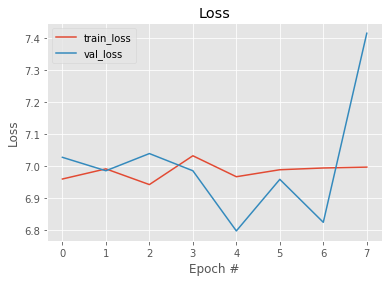

<Figure size 432x288 with 0 Axes>

In [15]:
summarize_diagnostics(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data_dir='../data/casting_defects/casting_data/test/'
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

In [ ]:
model.load_weights("weights.h5")
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
2*925*57*34000